<a href="https://colab.research.google.com/github/DjengoFang/Financial-Engineering-Ruppert-Matteson-/blob/main/Lab2.4.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [23]:
!pip install -q researchpy
import researchpy as rp

In [24]:
url = 'https://raw.githubusercontent.com/DjengoFang/Financial-Engineering-Ruppert-Matteson-/main/datasets/MCD_PriceDaily.csv'
data = pd.read_csv(url)
data.head(5)
     

,Date,Open,High,Low,Close,Volume,Adj Close
0,1/4/2010,62.63,63.07,62.31,62.78,5839300,53.99
1,1/5/2010,62.66,62.75,62.19,62.30,7099000,53.58
2,1/6/2010,62.20,62.41,61.06,61.45,10551300,52.85
3,1/7/2010,61.25,62.34,61.11,61.90,7517700,53.24
4,1/8/2010,62.27,62.41,61.60,61.84,6107300,53.19


# Problem 12

In [25]:
data['Net_Return'] = data['Adj Close'].pct_change()
data['Log_Return'] = np.log(data['Adj Close']) - np.log(data['Adj Close'].shift(1))
data.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close,Net_Return,Log_Return
0,1/4/2010,62.63,63.07,62.31,62.78,5839300,53.99,NaN,NaN
1,1/5/2010,62.66,62.75,62.19,62.30,7099000,53.58,-0.007594,-0.007623
2,1/6/2010,62.20,62.41,61.06,61.45,10551300,52.85,-0.013624,-0.013718
3,1/7/2010,61.25,62.34,61.11,61.90,7517700,53.24,0.007379,0.007352
4,1/8/2010,62.27,62.41,61.60,61.84,6107300,53.19,-0.000939,-0.000940


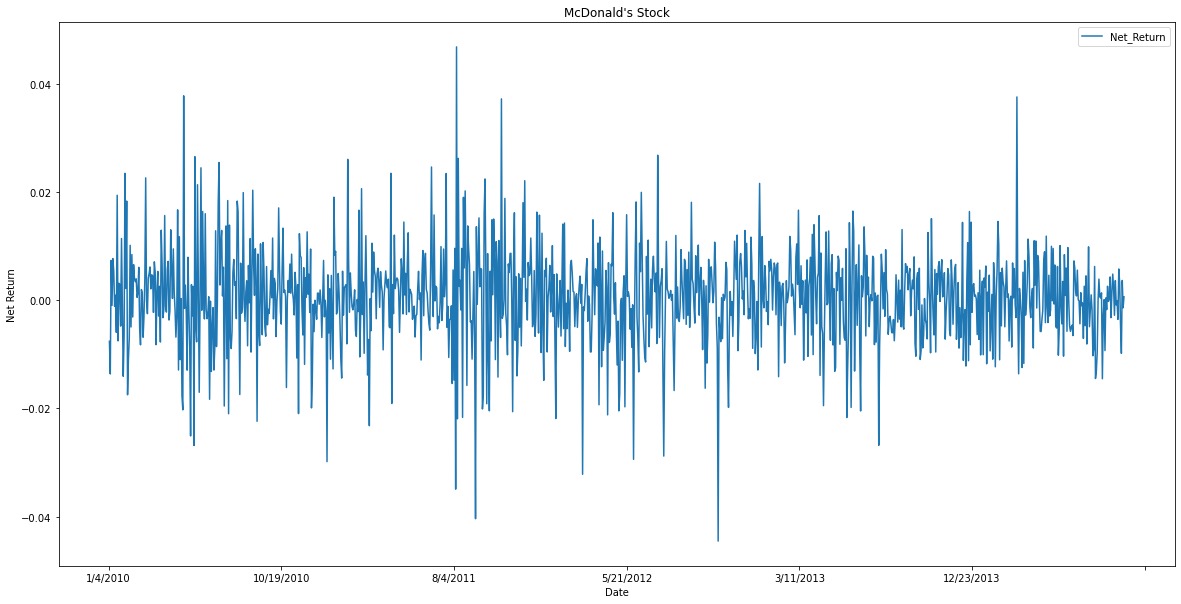

In [26]:
data.plot(x='Date', y=['Net_Return'],
        kind="line", figsize=(20, 10))
plt.xlabel("Date")
plt.ylabel("Net Return")
plt.title("McDonald's Stock")
plt.show()

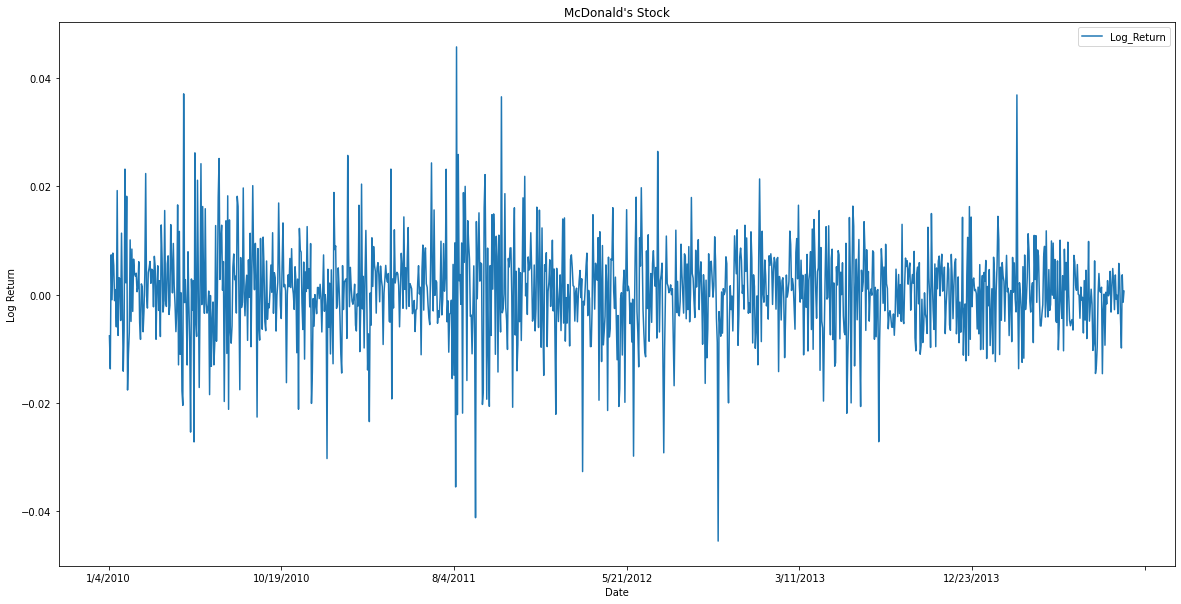

In [27]:
data.plot(x='Date', y=['Log_Return'],
        kind="line", figsize=(20, 10))
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title("McDonald's Stock")
plt.show()

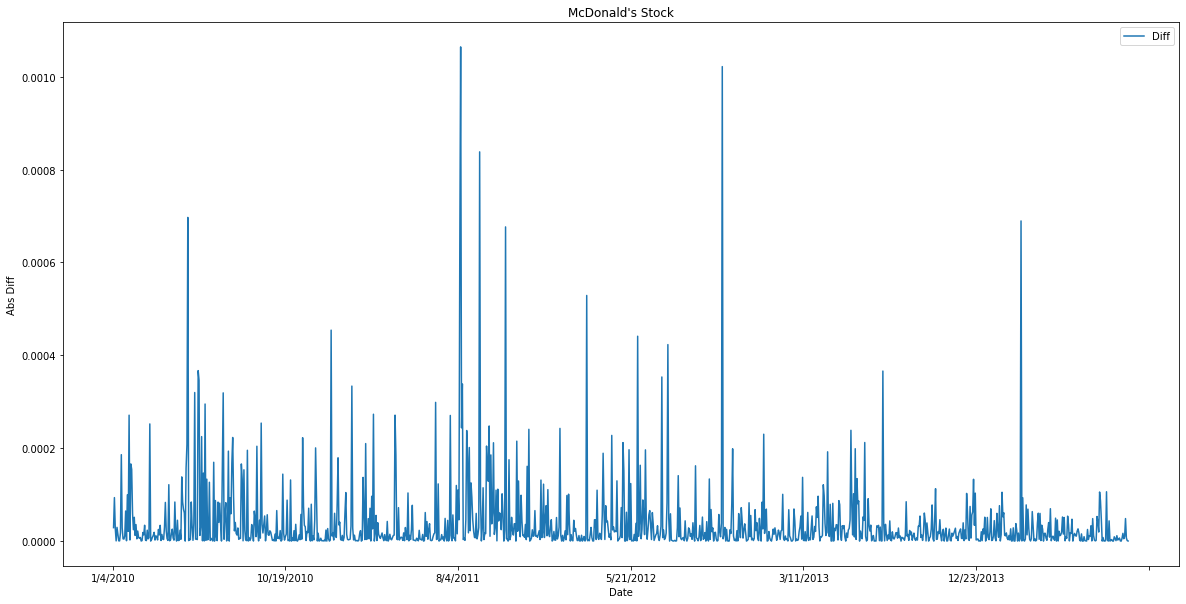

In [28]:
data['Diff'] = np.absolute(data['Net_Return'] - data['Log_Return'])
data.plot(x='Date', y=['Diff'],
        kind="line", figsize=(20, 10))
plt.xlabel("Date")
plt.ylabel("Abs Diff")
plt.title("McDonald's Stock")
plt.show()

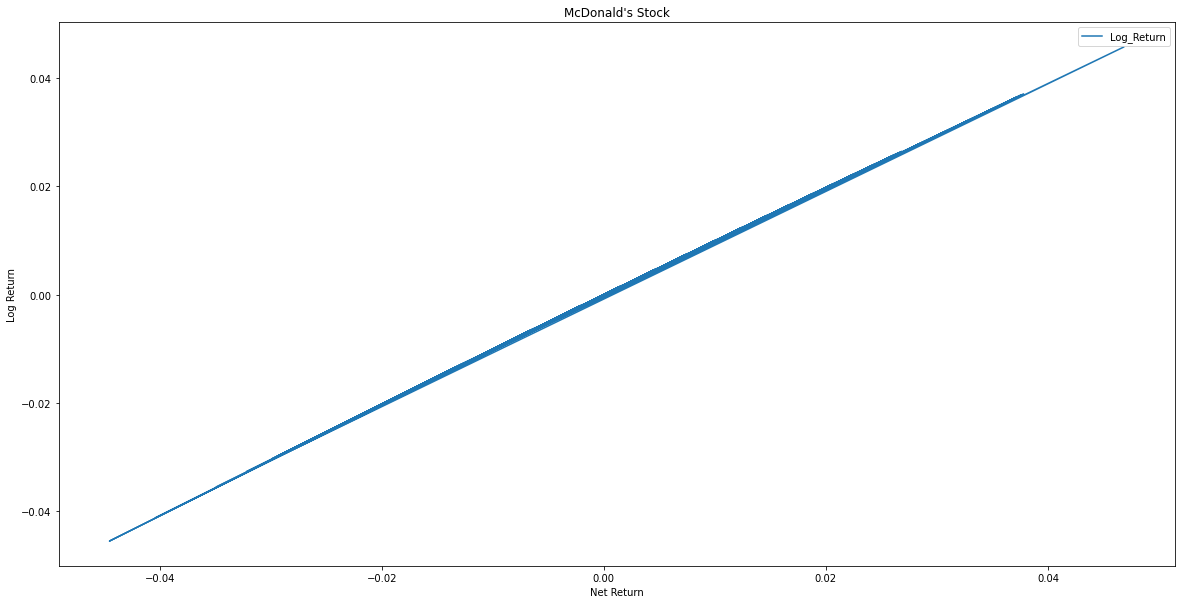

In [29]:


data.plot(x='Net_Return', y='Log_Return',
        kind="line", figsize=(20, 10))
plt.xlabel("Net Return")
plt.ylabel("Log Return")
plt.title("McDonald's Stock")
plt.show()

# Problem 13

In [30]:

data.describe()

,Open,High,Low,Close,Volume,Adj Close,Net_Return,Log_Return,Diff
count,1177.000000,1177.000000,1177.000000,1177.000000,1.177000e+03,1177.000000,1176.000000,1176.000000,1176.000000
mean,87.820977,88.330739,87.309737,87.830280,5.924534e+06,81.656619,0.000503,0.000463,0.000040
std,11.336650,11.341041,11.314590,11.325534,2.605843e+06,13.321179,0.008900,0.008901,0.000086
min,61.250000,62.340000,61.060000,61.450000,1.155900e+06,52.850000,-0.044529,-0.045551,0.000000
25%,77.470000,77.940000,77.120000,77.480000,4.321700e+06,68.880000,-0.004358,-0.004367,0.000003
50%,91.350000,91.730000,90.810000,91.340000,5.407500e+06,84.650000,0.000745,0.000745,0.000012
75%,97.150000,97.710000,96.780000,97.110000,6.755100e+06,93.070000,0.005432,0.005417,0.000038
max,103.690000,103.780000,102.790000,103.590000,3.647160e+07,101.820000,0.046848,0.045783,0.001064


# Problem 14

In [31]:
stats.ttest_ind(data['Net_Return'], data['Log_Return'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [32]:
# Independent sample t-test

rp.ttest(data['Net_Return'], data['Log_Return'], equal_variances = True, paired = False)

(     Variable       N      Mean        SD        SE  95% Conf.  Interval
 0  Net_Return  1176.0  0.000503  0.008900  0.000260  -0.000006  0.001012
 1  Log_Return  1176.0  0.000463  0.008901  0.000260  -0.000046  0.000972
 2    combined  2352.0  0.000483  0.008899  0.000183   0.000123  0.000843,
                         Independent t-test    results
 0  Difference (Net_Return - Log_Return) =      0.0000
 1                    Degrees of freedom =   2350.0000
 2                                     t =      0.1081
 3                 Two side test p value =      0.9139
 4                Difference < 0 p value =      0.5431
 5                Difference > 0 p value =      0.4569
 6                             Cohen's d =      0.0045
 7                             Hedge's g =      0.0045
 8                        Glass's delta1 =      0.0045
 9                      Point-Biserial r =      0.0022)

The p-value would be non-significant if we incorrectly used an unpaired t-test.

In [33]:
# Paired sample t-test
rp.ttest(data['Net_Return'], data['Log_Return'], equal_variances = True, paired = True)

(     Variable       N      Mean        SD        SE  95% Conf.  Interval
 0  Net_Return  1176.0  0.000503  0.008900  0.000260  -0.000006  0.001012
 1  Log_Return  1176.0  0.000463  0.008901  0.000260  -0.000046  0.000972
 2        diff  1176.0  0.000040  0.000086  0.000003   0.000035  0.000045,
                      Paired samples t-test    results
 0  Difference (Net_Return - Log_Return) =      0.0000
 1                    Degrees of freedom =   1175.0000
 2                                     t =     15.8656
 3                 Two side test p value =      0.0000
 4                Difference < 0 p value =      0.0000
 5                Difference > 0 p value =      1.0000
 6                             Cohen's d =      0.0045
 7                             Hedge's g =      0.0045
 8                        Glass's delta1 =      0.0045
 9                      Point-Biserial r =      0.4200)


It is crucial to use a paired t-test because the return and log return on any given
day are highly correlated and the independent samples t-test assumes that they
are independent. The paired t-test has a p-value of 2.2 × 10−16. Therefore,
using any reasonable significance level including, of course, 5%, we reject the
null hypothesis that the mean of the returns and mean of the log returns are
equal.

# Problem 16

In [41]:
iter = 10000
day = 20
bet = 85
m = data['Log_Return'].mean()
s = data['Log_Return'].std()
print(m, s)

0.0004630553179995098 0.008901467457248667


In [49]:
r = np.zeros(iter)
np.random.seed(1999) 
for i in range(len(r)):
  logR = np.random.normal(loc=m, scale=s, size=day)
  prices = 93.07 * np.exp(np.cumsum(logR))
  if prices.min() < bet:
    r[i] = 100
  else:
    r[i] = -1

In [50]:
df_describe = pd.DataFrame(r)
df_describe.describe()

,0
count,10000.000000
mean,-0.020300
std,9.899479
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,100.000000


# Problem 17

In [51]:
iter = 10000
day = 20
bet1 = 84.5
bet2 = 85
m = data['Log_Return'].mean()
s = data['Log_Return'].std()
print(m, s)

0.0004630553179995098 0.008901467457248667


In [52]:
r2 = np.zeros(iter)
np.random.seed(1999) 
for i in range(len(r2)):
  logR = np.random.normal(loc=m, scale=s, size=day)
  prices = 93.07 * np.exp(np.cumsum(logR))
  if prices.min() < bet1:
    r2[i] = 125
  elif prices.min() < bet2:
    r2[i] = 100
  else:
    r2[i] = -1

In [53]:
df_describe2 = pd.DataFrame(r2)
df_describe2.describe()

,0
count,10000.000000
mean,0.137200
std,11.550858
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,125.000000
